In [5]:
import pandas as pd
import numpy as np
from basketball_reference_scraper.players import get_stats, get_game_logs

df = get_game_logs('LeBron James', '2014-10-19', '2019-12-31', playoffs=False)
#print(df)

lebron=df.to_numpy()

In [6]:
ast=lebron[:,20]
pts=lebron[:,25]
WL=lebron[:,5]
trb=lebron[:,19]
pm=lebron[:,27]
fgp=lebron[:,10]
stl=lebron[:,21]
PM=np.zeros(len(pts))
FGP=np.zeros(len(pts))
STL=np.zeros(len(pts))
AST=np.zeros(len(pts))
PTS=np.zeros(len(pts))
TRB=np.zeros(len(pts))



for i in range(len(ast)):
    AST[i]=float(ast[i])
    PTS[i]=float(pts[i])
    TRB[i]=float(trb[i])
    PM[i]=int(pm[i])
    FGP[i]=float(fgp[i])
    STL[i]=int(stl[i])


    



In [7]:
for i in range(len(WL)):
    
    if WL[i][0]=='W':
        WL[i]=1
        
        continue
    
    if WL[i][0]=='L':
        WL[i]=-1
        
        
        
      
        


    

In [8]:
x=np.zeros((len(WL),3))

x[:,0]=TRB+AST+STL
x[:,1]=PM
x[:,2]=PTS
y=WL
#x[:,0]


In [9]:
def evaluate_classifier(w,b,x):
    if (np.dot(w,x)+b)>0:
        return 1
    if (np.dot(w,x)+b)<0:
        return -1
    return 0

In [10]:
def train_perceptron(x,y,n_iters):
    n=len(y)
    d=3
    w=np.zeros((d,))
    b=0
    done = False
    converged = True
    iters = 0
    np.random.seed(None)
    while not (done):
        
        done = True
        I=np.random.permutation(n)
        
        for i in range(n):
            j=I[i]
            
            if (evaluate_classifier(w,b,x[j,:])!=y[j]) :
                w=w+y[j]*x[j,:]
                b=b+y[j]
                done = False
                
        iters=iters+1
        
        if iters > n_iters:
            done = True
            converged = False
    if converged:
        print ("Perceptron algorithm: iterations until convergence: ", iters)
    else:
        print ("Perceptron algorithm: did not converge within the specified number of iterations")
    return w, b, converged ,n_iters

In [11]:
w,b,converged,n=train_perceptron(x,y,1000)

Perceptron algorithm: did not converge within the specified number of iterations


In [12]:
print(w,b,converged,n)

[ 4. 83. 28.] -385 False 1000


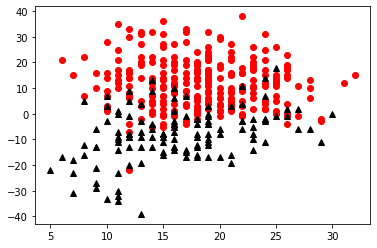

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure()
#ax = plt.axes(projection="3d")




plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
plt.plot(x[(y==-1),0], x[(y==-1),1], 'k^')

plt.show()